In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import optuna
from optuna.samplers import TPESampler
import random
import os
from datetime import datetime
from torch.utils.tensorboard import SummaryWriter

In [2]:
def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

In [3]:
print(os.getcwd())

c:\Users\jason\OneDrive\桌面\Northeastern University\course\quarter 4\ALY 6020\W5\assignment


In [4]:
os.chdir(r'C:\Users\jason\OneDrive\桌面\Northeastern University\course\quarter 4\ALY 6020\W5\assignment')
print(os.getcwd())

C:\Users\jason\OneDrive\桌面\Northeastern University\course\quarter 4\ALY 6020\W5\assignment


In [5]:
df = pd.read_csv(r'C:\Users\jason\OneDrive\桌面\Northeastern University\course\quarter 4\ALY 6020\W5\assignment\letters.csv')

In [6]:
df.head()

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
0,1,0,0,0,0,0,0,0,0,0,...,0,254,0,0,0,0,0,0,0,0
1,0,0,0,0,137,137,192,86,72,1,...,254,0,0,75,254,254,254,17,0,0
2,1,0,0,0,3,141,139,3,0,0,...,0,184,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,94,255,69,0,0,0,0,0
4,0,0,0,0,155,254,254,254,157,30,...,253,0,0,0,223,253,253,253,129,0


In [7]:
df.describe()

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
count,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000
mean,4.456643,0.171357,0.164476,1.192833,28.043952,36.084976,42.713952,46.092310,44.542452,38.948524,...,42.461048,102.124119,107.683952,79.750548,56.31481,39.244643,25.754262,14.858619,5.844476,0.829643
std,2.887730,5.726352,5.515774,14.692403,70.505431,78.631145,84.390533,87.287033,85.740313,81.223946,...,85.090524,110.961953,111.360981,104.287852,94.20847,82.799118,69.597297,54.018163,33.293343,11.818307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,39.000000,60.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,29.000000,21.000000,0.000000,...,10.000000,247.000000,250.000000,191.000000,86.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000


In [8]:
df.shape

(42000, 46)

In [9]:
for columns in df.columns:
    if df.loc[:,columns].isna().sum() != 0:
        print(columns)

In [10]:
y = df.loc[:,'label']

In [11]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    2
41996    0
41997    2
41998    2
41999    2
Name: label, Length: 42000, dtype: int64

In [12]:
X = df.drop('label', axis=1)

In [13]:
X.shape

(42000, 45)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

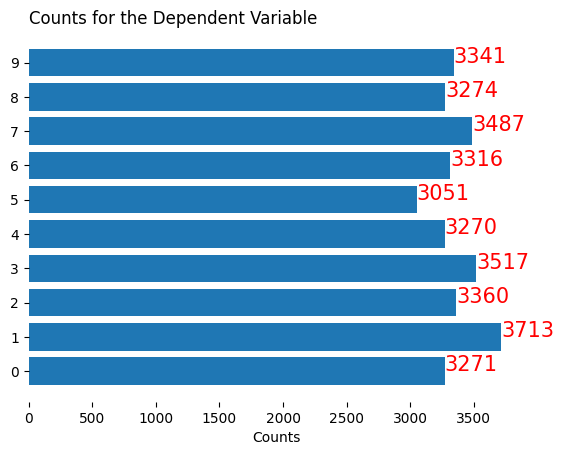

In [16]:
plt.barh(y_train.value_counts().sort_values().index, y_train.value_counts().sort_values().values)
for i, counts in y_train.value_counts().sort_values().items():
    plt.text(counts, i, f'{counts}', fontsize=15, color='red')
plt.yticks(y_train.value_counts().sort_values().index)
plt.xlabel('Counts')
plt.title('Counts for the Dependent Variable', loc='left')
ax = plt.gca()
ax.set_frame_on(False)

In [17]:
# KNN model
# PCA to reduce dimensions
pca = PCA()

In [18]:
X_pca = pca.fit_transform(X)

In [19]:
# Store explained variance for each component in a variable
exp_var_pca = pca.explained_variance_ratio_

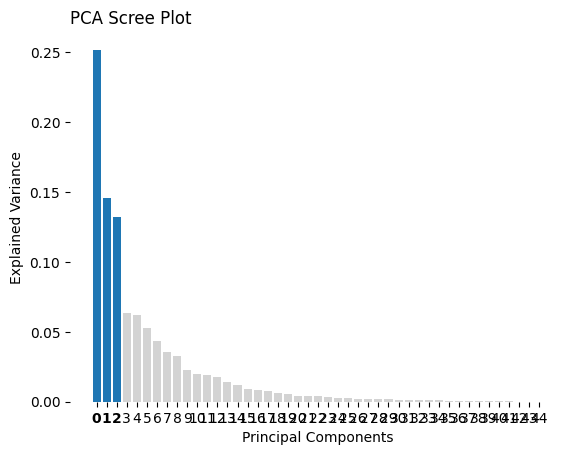

In [20]:
bar_color = ['#1f77b4']*3 + ['lightgrey']*(X.shape[0]-3)

# Visualise the components versus their explained variance
plt.title('PCA Scree Plot', loc='left')
plt.bar(range(0,len(exp_var_pca)),exp_var_pca, color=bar_color)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.xticks(range(X.shape[1]))

xticklabels = plt.gca().get_xticklabels()
for idx, label in enumerate(xticklabels):
    if idx <= 2:
        label.set_fontweight('bold')


ax = plt.gca() ## Remove the border to reduce cognitive load
ax.set_frame_on(False) ## Remove the border to reduce cognitive load

In [21]:
# Perform a new PCA with components equal "3"
pca_update = PCA(n_components=3)

In [22]:
# Store the results in a new variable
result = pca_update.fit_transform(X)

Since there are ten labels, visualising them might not be a good idea. Hence, I chose not to do so.

In [23]:
#Determine the hyperparameter in KNN algorithms: K
Ks=50
mean_acc=np.zeros((Ks-1))


# Train and predict
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,yhat)

In [24]:
# Observe the best accuracy with the optimal number of K
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.665952380952381 with k= 14


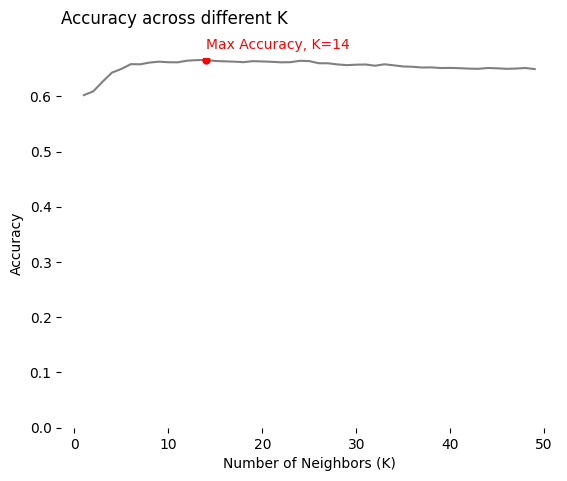

In [25]:
# Visualise the accuracy over iterations
plt.plot(range(1,Ks),mean_acc, color='grey')
plt.title('Accuracy across different K', loc='left', y=1.07)
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.plot(mean_acc.argmax()+1, mean_acc.max(), marker='o', color='red', markersize=5)
plt.yticks(np.arange(0, np.max(mean_acc), 0.1))
#plt.vlines(x=mean_acc.argmax()+1, ymin=0, ymax=mean_acc.max(), color='red', linestyles='--')
plt.text(mean_acc.argmax()+1, mean_acc.max()+0.02, f'Max Accuracy, K={mean_acc.argmax()+1}', color='red')
ax = plt.gca()  ## Remove the border to reduce cognitive load
ax.set_frame_on(False)  ## Remove the border to reduce cognitive load
plt.show()

In [26]:
knnmodel = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1)

In [27]:
# Fit the model
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=np.int64(14))

In [28]:
# Predict the model, which should obtain the same accuracy above
y_predict1 = knnmodel.predict(X_test)

In [29]:
# Compute the accuracy
acc_knn = accuracy_score(y_test,y_predict1)
acc_knn

0.665952380952381

In [30]:
# Display the confusion matrix
cm = confusion_matrix(y_test,y_predict1)
cm

array([[752,   1,  19,   6,  16,   8,  30,  16,   4,   9],
       [  0, 934,   2,   3,   6,   6,   3,   6,   7,   4],
       [ 48,  42, 507,  53,  21,   8,  12,  39,  58,  29],
       [  8,  28,  98, 468,  12,  45,  11,  32,  93,  39],
       [ 23,  63,   1,  11, 417,  24,  27, 154,  11,  71],
       [  8,  31,  21,  98,  18, 414,  40,  50,  20,  44],
       [ 26,  21,  18,  12,  16,  11, 713,   0,   4,   0],
       [  8,   8,   5,  14,  27,  43,   0, 587,  14, 208],
       [ 17,  78,  59,  76,  16,  38,  27,  28, 413,  37],
       [ 20,  10,   8,  18,  32,  22,   0, 322,  26, 389]])

In [31]:
print('Classification report for the KNN model:')
print(classification_report(y_test, y_predict1))

Classification report for the KNN model:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       861
           1       0.77      0.96      0.85       971
           2       0.69      0.62      0.65       817
           3       0.62      0.56      0.59       834
           4       0.72      0.52      0.60       802
           5       0.67      0.56      0.61       744
           6       0.83      0.87      0.85       821
           7       0.48      0.64      0.55       914
           8       0.64      0.52      0.57       789
           9       0.47      0.46      0.46       847

    accuracy                           0.67      8400
   macro avg       0.67      0.66      0.66      8400
weighted avg       0.67      0.67      0.66      8400



In [32]:
class basicNN (nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 100)
        self.fc2 = nn.Linear(100, 75)
        self.fc3 = nn.Linear(75, 50)
        self.fc4 = nn.Linear(50, 25)
        self.fc5 = nn.Linear(25, len(y_train.unique()))
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc5(x)
        
        return x

In [33]:
nn_model_1 = basicNN()

In [34]:
loss_fn = nn.CrossEntropyLoss()

In [35]:
X_train_nn, X_valid_nn, y_train_nn, y_valid_nn = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

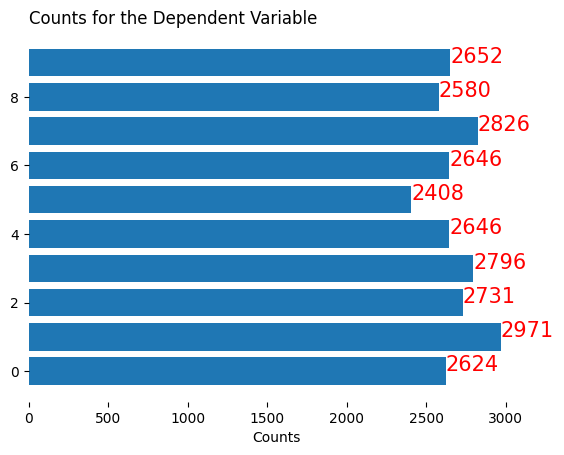

In [36]:
plt.barh(y_train_nn.value_counts().sort_values().index, y_train_nn.value_counts().sort_values().values)
for i, counts in y_train_nn.value_counts().sort_values().items():
    plt.text(counts, i, f'{counts}', fontsize=15, color='red')
plt.xlabel('Counts')
plt.title('Counts for the Dependent Variable', loc='left')
ax = plt.gca()
ax.set_frame_on(False)

In [37]:
X_train_tensor = torch.tensor(X_train_nn.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_nn.values, dtype=torch.long)

X_valid_tensor = torch.tensor(X_valid_nn.values, dtype=torch.float32)
y_valid_tensor = torch.tensor(y_valid_nn.values, dtype=torch.long)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [38]:
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=X_test_tensor.shape[0], shuffle=False)

In [39]:
# Define an objective function
def objective(trial):
    # Select learning rate, dropout rate, and batch size to optimise
    lr = trial.suggest_float('lr', 1e-7, 1e-3, log=True)  # Use a log-uniform distribution to select the learning rate
    batch_size = trial.suggest_int('batch_size', 16, 256, step=16) # Select the batch size from the number 16 to 256, with step equal to 16
    beta1 = trial.suggest_float('beta1', 0.01, 0.99)
    beta2 = trial.suggest_float('beta2', 0.01, 0.99)

    # Use TensorDataset to properly separate inputs and labels
    train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(TensorDataset(X_valid_tensor, y_valid_tensor), batch_size=batch_size, shuffle=False)

    
    optimizer = optim.Adam(nn_model_1.parameters(), lr=lr, betas=(beta1, beta2))

    # Set model to training mode
    nn_model_1.train()
    
    # Training loop
    for i, data in enumerate(train_loader):
        inputs, labels = data
        
        # Zero your gradients for every batch!
        optimizer.zero_grad()
        
        # Make predictions for this batch
        outputs = nn_model_1(inputs)
        
        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()
        
        # Adjust learning weights
        optimizer.step()

    # Set model to evaluation mode after training
    nn_model_1.train(False)

    running_vloss = 0.0  # Initialize validation loss
    # Validation loop
    for j, vdata in enumerate(valid_loader):
        vinputs, vlabels = vdata
        voutputs = nn_model_1(vinputs)
        vloss = loss_fn(voutputs, vlabels)
        running_vloss += vloss
    
    avg_vloss = running_vloss / (j + 1)  # Calculate average validation loss
    return avg_vloss

sampler = TPESampler(seed=42)

# Create and optimize the study
study_for_nn_model_Adam_1 = optuna.create_study(direction='minimize', sampler=sampler)
study_for_nn_model_Adam_1.optimize(objective, n_trials=100)


[I 2024-12-12 17:54:40,931] A new study created in memory with name: no-name-3fdb3ebb-3714-4112-a235-5bf36fda5d7a
[I 2024-12-12 17:54:45,701] Trial 0 finished with value: 3.173088550567627 and parameters: {'lr': 3.14891164795686e-06, 'batch_size': 256, 'beta1': 0.727354062975177, 'beta2': 0.5966853145130959}. Best is trial 0 with value: 3.173088550567627.
[I 2024-12-12 17:54:49,592] Trial 1 finished with value: 3.0330305099487305 and parameters: {'lr': 4.20798866960663e-07, 'batch_size': 48, 'beta1': 0.06692193992483547, 'beta2': 0.8588526228594364}. Best is trial 1 with value: 3.0330305099487305.
[I 2024-12-12 17:54:51,216] Trial 2 finished with value: 2.141112804412842 and parameters: {'lr': 2.5378155082656606e-05, 'batch_size': 192, 'beta1': 0.0301728044098864, 'beta2': 0.9605116551187545}. Best is trial 2 with value: 2.141112804412842.
[I 2024-12-12 17:54:54,001] Trial 3 finished with value: 1.1849969625473022 and parameters: {'lr': 0.00021368329072358748, 'batch_size': 64, 'beta1'

In [40]:
nn_model_2 = basicNN()

In [41]:
study_for_nn_model_Adam_1 = study_for_nn_model_Adam_1.best_params

In [42]:
# The selection of hyperparameters
print('Hyperparameter selections for the shallower neural network model:')
print('Learning rate: {}'.format(study_for_nn_model_Adam_1['lr']))
print('Batch size: {}'.format(study_for_nn_model_Adam_1['batch_size']))
print('Beta 1: {}'.format(study_for_nn_model_Adam_1['beta1']))
print('Beta 2: {}'.format(study_for_nn_model_Adam_1['beta2']))

Hyperparameter selections for the shallower neural network model:
Learning rate: 0.00010171022443716247
Batch size: 160
Beta 1: 0.7477466869550883
Beta 2: 0.39205185231665357


In [43]:
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=study_for_nn_model_Adam_1['batch_size'], shuffle=True)
valid_loader = DataLoader(TensorDataset(X_valid_tensor, y_valid_tensor), batch_size=study_for_nn_model_Adam_1['batch_size'], shuffle=False)

In [44]:
optimizer = optim.Adam(nn_model_2.parameters(), lr=study_for_nn_model_Adam_1['lr'], betas=(study_for_nn_model_Adam_1['beta1'], study_for_nn_model_Adam_1['beta2']))

In [45]:
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('./runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

In [46]:
def train_one_epoch(epoch_index, writer):
    running_loss = 0.
    last_loss = 0.
    
    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(train_loader):
        # Every data instance is an input + label pair
        inputs, labels = data
        
        # Zero your gradients for every batch!
        optimizer.zero_grad()
        
        # Make predictions for this batch
        outputs = nn_model_2(inputs)
        
        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()
        
        # Adjust learning weights
        optimizer.step()
        
        # Gather data and report
        running_loss += loss.item()

    last_loss = running_loss/ (i+1)
    tb_x = epoch_index+1
    writer.add_scalar('Loss/train', last_loss, tb_x)
            
    return last_loss

In [47]:
EPOCHS = 500

avg_loss_list = []
avg_vloss_list = []
acc_list = []

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))
    
    nn_model_2.train()
    avg_loss = train_one_epoch(epoch_number, writer)
    
    nn_model_2.eval()
    running_vloss = 0.0
    for i, vdata in enumerate(valid_loader):
        vinputs, vlabels = vdata
        voutputs = nn_model_2(vinputs)
        vloss = loss_fn(voutputs, vlabels)
        running_vloss += vloss.item()
    
    avg_vloss = running_vloss / len(valid_loader)
    print('LOSS: training {} testing {}'.format(avg_loss, avg_vloss))
    
    writer.add_scalars('Training vs. Validation Loss',
                       {'Training': avg_loss, 'Validation': avg_vloss},
                       epoch_number + 1)
    writer.flush()

    avg_loss_list.append(avg_loss)
    avg_vloss_list.append(avg_vloss)

    predicted_classes = []
    actual_labels = []

    with torch.no_grad():
        for tinputs, tlabels in test_loader:
            toutputs = nn_model_2(tinputs)
            _, predicted = torch.max(toutputs, 1)
            predicted_classes.extend(predicted.cpu().numpy())
            actual_labels.extend(tlabels.cpu().numpy())

    acc = accuracy_score(actual_labels, predicted_classes)
    acc_list.append(acc)

    epoch_number += 1

EPOCH 1:
LOSS: training 1.9022759170759291 testing 1.50101010288511
EPOCH 2:
LOSS: training 1.342044540813991 testing 1.2294877370198567
EPOCH 3:
LOSS: training 1.1790754681541806 testing 1.133954073701586
EPOCH 4:
LOSS: training 1.1063111846645672 testing 1.0882975331374578
EPOCH 5:
LOSS: training 1.0617971175483294 testing 1.058374482960928
EPOCH 6:
LOSS: training 1.0309882788431077 testing 1.0283772264208113
EPOCH 7:
LOSS: training 1.0082599545518558 testing 1.012089607261476
EPOCH 8:
LOSS: training 0.987520443541663 testing 0.9971743509882972
EPOCH 9:
LOSS: training 0.9723431716362635 testing 0.9890451317741757
EPOCH 10:
LOSS: training 0.9583471115855944 testing 0.9737819660277593
EPOCH 11:
LOSS: training 0.9441562507833753 testing 0.9663584360054561
EPOCH 12:
LOSS: training 0.9332551395609265 testing 0.9594785542715163
EPOCH 13:
LOSS: training 0.9226164101135164 testing 0.9506697640532539
EPOCH 14:
LOSS: training 0.9132342161167235 testing 0.9456195632616679
EPOCH 15:
LOSS: traini

In [48]:
# Again, grab a single mini-batch of images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# add_graph() will trace the sample input through your model,
# and render it as a graph.
writer.add_graph(nn_model_2, images)
writer.flush()

writer.close()

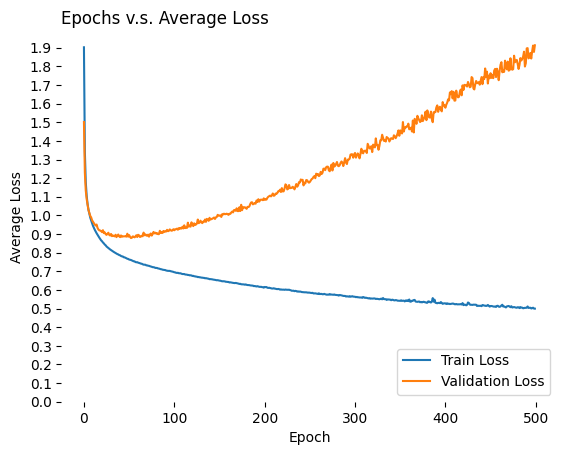

In [49]:
max_value = max(np.max(avg_loss_list), np.max(avg_vloss_list))

plt.plot(avg_loss_list)
plt.plot(avg_vloss_list)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.yticks(np.arange(0, max_value, 0.1))
plt.title('Epochs v.s. Average Loss', loc='left')
plt.legend(['Train Loss', 'Validation Loss'], loc='lower right')
ax = plt.gca()
ax.set_frame_on(False)

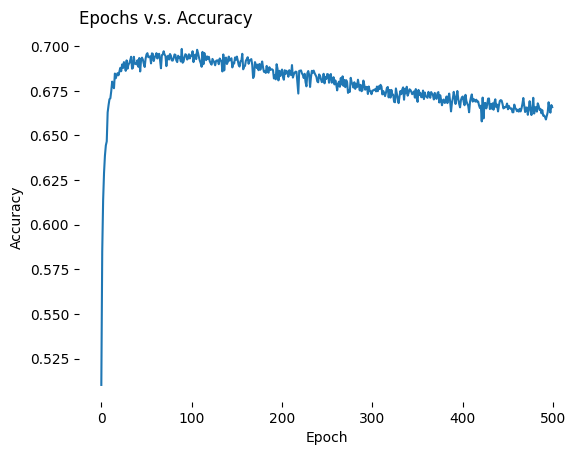

In [50]:
plt.plot(acc_list)
plt.title('Epochs v.s. Accuracy', loc='left')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
ax = plt.gca()
ax.set_frame_on(False)

In [51]:
acc_list_shallower = acc_list.copy()

In [52]:
nn_model_2.eval()

predicted_classes = []
actual_labels = []

with torch.no_grad():
    for i, vdata in enumerate(test_loader):
        vinputs, vlabels = vdata
        voutputs = nn_model_2(vinputs)
        
        _, predicted = torch.max(voutputs, 1)
        
        predicted_classes.extend(predicted.cpu().numpy())
        actual_labels.extend(vlabels.cpu().numpy())

In [53]:
acc_2 = accuracy_score(actual_labels,predicted_classes)
acc_2

0.6658333333333334

In [54]:
cm = confusion_matrix(actual_labels, predicted_classes)
cm

array([[731,   0,  44,   8,  11,  13,  26,   7,   9,  12],
       [  1, 892,   7,   6,  16,   7,   6,   2,  24,  10],
       [ 41,  18, 513,  85,  16,  15,  11,  29,  64,  25],
       [  7,  10,  91, 455,  12,  73,   7,  30, 111,  38],
       [ 24,  32,  17,  14, 433,  38,  23, 141,  19,  61],
       [  4,  12,  11,  78,  21, 450,  45,  49,  31,  43],
       [ 20,  12,  14,   9,  18,  31, 708,   0,   9,   0],
       [  9,   7,  10,  13,  25,  37,   1, 609,  12, 191],
       [ 15,  48,  65, 115,  15,  49,  17,  29, 394,  42],
       [ 20,   8,  10,  30,  16,  17,   0, 323,  15, 408]])

In [55]:
print('Classification report for the shallower neural network model:')
print(classification_report(actual_labels, predicted_classes))

Classification report for the shallower neural network model:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       861
           1       0.86      0.92      0.89       971
           2       0.66      0.63      0.64       817
           3       0.56      0.55      0.55       834
           4       0.74      0.54      0.63       802
           5       0.62      0.60      0.61       744
           6       0.84      0.86      0.85       821
           7       0.50      0.67      0.57       914
           8       0.57      0.50      0.53       789
           9       0.49      0.48      0.49       847

    accuracy                           0.67      8400
   macro avg       0.67      0.66      0.66      8400
weighted avg       0.67      0.67      0.66      8400



In [79]:
class basicNN_2 (nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 200)
        self.fc2 = nn.Linear(200, 175)
        self.fc3 = nn.Linear(175, 150)
        self.fc4 = nn.Linear(150, 125)
        self.fc5 = nn.Linear(125, 100)
        self.fc6 = nn.Linear(100, 75)
        self.fc7 = nn.Linear(75, 50)
        self.fc8 = nn.Linear(50, 25)
        self.fc9 = nn.Linear(25, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc5(x)
        x = self.relu(x)
        x = self.fc6(x)
        x = self.relu(x)
        x = self.fc7(x)
        x = self.relu(x)
        x = self.fc8(x)
        x = self.relu(x)
        x = self.fc9(x)

        
        return x

In [80]:
nn_model_3 = basicNN_2()

In [81]:
# Define an objective function
def objective(trial):
    # Select learning rate, dropout rate, and batch size to optimise
    lr = trial.suggest_float('lr', 1e-7, 1e-5, log=True)  # Use a log-uniform distribution to select the learning rate
    batch_size = trial.suggest_int('batch_size', 16, 256, step=16) # Select the batch size from the number 16 to 256, with step equal to 16
    beta1 = trial.suggest_float('beta1', 0.01, 0.99)
    beta2 = trial.suggest_float('beta2', 0.01, 0.99)

    # Use TensorDataset to properly separate inputs and labels
    train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(TensorDataset(X_valid_tensor, y_valid_tensor), batch_size=batch_size, shuffle=False)

    
    optimizer = optim.Adam(nn_model_3.parameters(), lr=lr, betas=(beta1, beta2))

    # Set model to training mode
    nn_model_3.train()
    
    # Training loop
    for i, data in enumerate(train_loader):
        inputs, labels = data
        
        # Zero your gradients for every batch!
        optimizer.zero_grad()
        
        # Make predictions for this batch
        outputs = nn_model_3(inputs)
        
        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()
        
        # Adjust learning weights
        optimizer.step()

    # Set model to evaluation mode after training
    nn_model_3.train(False)

    running_vloss = 0.0  # Initialize validation loss
    # Validation loop
    for j, vdata in enumerate(valid_loader):
        vinputs, vlabels = vdata
        voutputs = nn_model_3(vinputs)
        vloss = loss_fn(voutputs, vlabels)
        running_vloss += vloss
    
    avg_vloss = running_vloss / (j + 1)  # Calculate average validation loss
    return avg_vloss

sampler = TPESampler(seed=42)

# Create and optimize the study
study_for_nn_model_Adam_2 = optuna.create_study(direction='minimize', sampler=sampler)
study_for_nn_model_Adam_2.optimize(objective, n_trials=100)


[I 2024-12-12 19:13:53,583] A new study created in memory with name: no-name-401c5e36-2672-4ec4-96c9-541bc9db1c42
[I 2024-12-12 19:13:56,396] Trial 0 finished with value: 2.3117222785949707 and parameters: {'lr': 5.611516415334497e-07, 'batch_size': 256, 'beta1': 0.727354062975177, 'beta2': 0.5966853145130959}. Best is trial 0 with value: 2.3117222785949707.
[I 2024-12-12 19:14:03,293] Trial 1 finished with value: 2.3103699684143066 and parameters: {'lr': 2.0513382630874477e-07, 'batch_size': 48, 'beta1': 0.06692193992483547, 'beta2': 0.8588526228594364}. Best is trial 1 with value: 2.3103699684143066.
[I 2024-12-12 19:14:05,925] Trial 2 finished with value: 2.307927131652832 and parameters: {'lr': 1.5930522616240998e-06, 'batch_size': 192, 'beta1': 0.0301728044098864, 'beta2': 0.9605116551187545}. Best is trial 2 with value: 2.307927131652832.
[I 2024-12-12 19:14:11,209] Trial 3 finished with value: 2.2906768321990967 and parameters: {'lr': 4.6225890010208275e-06, 'batch_size': 64, 'b

In [82]:
nn_model_4 = basicNN_2()

In [83]:
study_for_nn_model_Adam_2 = study_for_nn_model_Adam_2.best_params

In [84]:
# The selection of hyperparameters
print('Hyperparameter selections for the deeper neural network model:')
print('Learning rate: {}'.format(study_for_nn_model_Adam_2['lr']))
print('Batch size: {}'.format(study_for_nn_model_Adam_2['batch_size']))
print('Beta 1: {}'.format(study_for_nn_model_Adam_2['beta1']))
print('Beta 2: {}'.format(study_for_nn_model_Adam_2['beta2']))

Hyperparameter selections for the deeper neural network model:
Learning rate: 6.316187902377715e-06
Batch size: 96
Beta 1: 0.903657802957001
Beta 2: 0.19841323443018594


In [85]:
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=study_for_nn_model_Adam_2['batch_size'], shuffle=True)
valid_loader = DataLoader(TensorDataset(X_valid_tensor, y_valid_tensor), batch_size=study_for_nn_model_Adam_2['batch_size'], shuffle=False)

In [86]:
optimizer = optim.Adam(nn_model_4.parameters(), lr=study_for_nn_model_Adam_2['lr'], betas=(study_for_nn_model_Adam_2['beta1'], study_for_nn_model_Adam_2['beta2']))

In [87]:
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('./runs/fashion_trainer_2_{}'.format(timestamp))
epoch_number = 0

In [88]:
def train_one_epoch(epoch_index, writer):
    running_loss = 0.
    last_loss = 0.
    
    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(train_loader):
        # Every data instance is an input + label pair
        inputs, labels = data
        
        # Zero your gradients for every batch!
        optimizer.zero_grad()
        
        # Make predictions for this batch
        outputs = nn_model_4(inputs)
        
        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()
        
        # Adjust learning weights
        optimizer.step()
        
        # Gather data and report
        running_loss += loss.item()

    last_loss = running_loss/ (i+1)
    tb_x = epoch_index+1
    writer.add_scalar('Loss/train', last_loss, tb_x)
            
    return last_loss


In [ ]:
EPOCHS = 500

avg_loss_list = []
avg_vloss_list = []
acc_list = []

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))
    
    nn_model_4.train()
    avg_loss = train_one_epoch(epoch_number, writer)
    
    nn_model_4.eval()
    running_vloss = 0.0
    for i, vdata in enumerate(valid_loader):
        vinputs, vlabels = vdata
        voutputs = nn_model_4(vinputs)
        vloss = loss_fn(voutputs, vlabels)
        running_vloss += vloss.item()
    
    avg_vloss = running_vloss / len(valid_loader)
    print('LOSS: training {} testing {}'.format(avg_loss, avg_vloss))
    
    writer.add_scalars('Training vs. Validation Loss',
                       {'Training': avg_loss, 'Validation': avg_vloss},
                       epoch_number + 1)
    writer.flush()

    avg_loss_list.append(avg_loss)
    avg_vloss_list.append(avg_vloss)

    predicted_classes = []
    actual_labels = []

    with torch.no_grad():
        for tinputs, tlabels in test_loader:
            toutputs = nn_model_4(tinputs)
            _, predicted = torch.max(toutputs, 1)
            predicted_classes.extend(predicted.cpu().numpy())
            actual_labels.extend(tlabels.cpu().numpy())

    acc = accuracy_score(actual_labels, predicted_classes)
    acc_list.append(acc)

    epoch_number += 1

EPOCH 1:
LOSS: training 2.288886115380696 testing 2.2620333841868807
EPOCH 2:
LOSS: training 2.213171827793121 testing 2.1495712280273436
EPOCH 3:
LOSS: training 2.0597866543701717 testing 1.978825388635908
EPOCH 4:
LOSS: training 1.8924966084105628 testing 1.8311571308544703
EPOCH 5:
LOSS: training 1.755193407194955 testing 1.710211135659899
EPOCH 6:
LOSS: training 1.6369000439132964 testing 1.6035794360297067
EPOCH 7:
LOSS: training 1.5389291197061539 testing 1.5288174101284573
EPOCH 8:
LOSS: training 1.4607050022908619 testing 1.449188893181937
EPOCH 9:
LOSS: training 1.394599676983697 testing 1.3900348850658961
EPOCH 10:
LOSS: training 1.3435674820627486 testing 1.3446212087358747
EPOCH 11:
LOSS: training 1.3026423607553754 testing 1.3116525871413094
EPOCH 12:
LOSS: training 1.2686158112117223 testing 1.2768288237707957
EPOCH 13:
LOSS: training 1.2461143736328397 testing 1.2501850426197052
EPOCH 14:
LOSS: training 1.2168370636446135 testing 1.234504795074463
EPOCH 15:
LOSS: trainin

In [90]:
# Again, grab a single mini-batch of images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# add_graph() will trace the sample input through your model,
# and render it as a graph.
writer.add_graph(nn_model_4, images)
writer.flush()

writer.close()


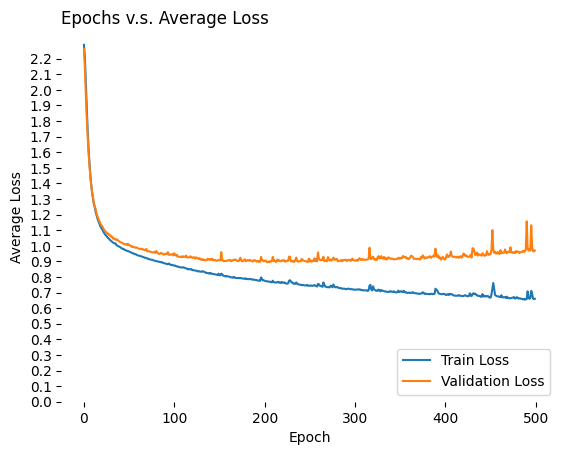

In [91]:
max_value = max(np.max(avg_loss_list), np.max(avg_vloss_list))

plt.plot(avg_loss_list)
plt.plot(avg_vloss_list)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.yticks(np.arange(0, max_value, 0.1))
plt.title('Epochs v.s. Average Loss', loc='left')
plt.legend(['Train Loss', 'Validation Loss'], loc='lower right')
ax = plt.gca()
ax.set_frame_on(False)


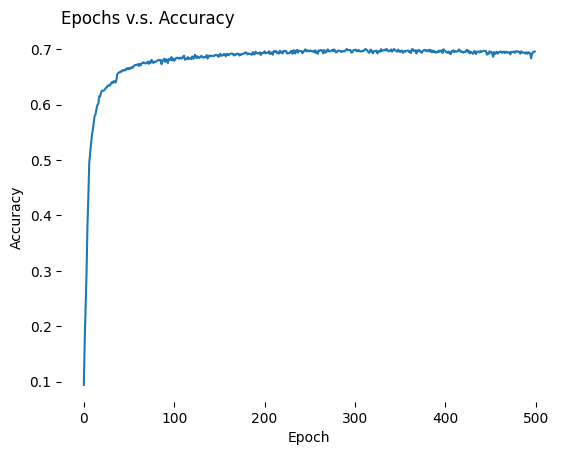

In [92]:
plt.plot(acc_list)
plt.title('Epochs v.s. Accuracy', loc='left')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
ax = plt.gca()
ax.set_frame_on(False)

In [93]:
acc_list_deeper = acc_list.copy()

In [94]:
nn_model_4.eval()

predicted_classes = []
actual_labels = []

with torch.no_grad():
    for i, vdata in enumerate(test_loader):
        vinputs, vlabels = vdata
        voutputs = nn_model_4(vinputs)
        
        _, predicted = torch.max(voutputs, 1)
        
        predicted_classes.extend(predicted.cpu().numpy())
        actual_labels.extend(vlabels.cpu().numpy())

In [95]:
acc_3 = accuracy_score(actual_labels,predicted_classes)
acc_3

0.695952380952381

In [96]:
cm = confusion_matrix(actual_labels, predicted_classes)
cm

array([[737,   0,  36,   9,  17,   8,  23,  10,  16,   5],
       [  0, 918,   2,   2,   9,   7,   5,   0,  18,  10],
       [ 29,  14, 533,  65,  23,   6,  10,  33,  76,  28],
       [  4,  12,  80, 518,  10,  38,   3,  24, 104,  41],
       [ 17,  35,  10,   8, 483,  23,  18, 134,  19,  55],
       [  3,  19,  15, 102,  22, 426,  33,  39,  35,  50],
       [ 22,   7,  10,  16,  16,  24, 720,   0,   6,   0],
       [  7,  10,   5,  14,  35,  37,   0, 609,  14, 183],
       [  6,  62,  55,  78,  20,  22,  10,  22, 480,  34],
       [ 14,   8,   8,  21,  22,  14,   0, 308,  30, 422]])

In [97]:
print('Classification report for the deeper neural network model:')
print(classification_report(actual_labels, predicted_classes))

Classification report for the deeper neural network model:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       861
           1       0.85      0.95      0.89       971
           2       0.71      0.65      0.68       817
           3       0.62      0.62      0.62       834
           4       0.74      0.60      0.66       802
           5       0.70      0.57      0.63       744
           6       0.88      0.88      0.88       821
           7       0.52      0.67      0.58       914
           8       0.60      0.61      0.60       789
           9       0.51      0.50      0.50       847

    accuracy                           0.70      8400
   macro avg       0.70      0.69      0.69      8400
weighted avg       0.70      0.70      0.70      8400



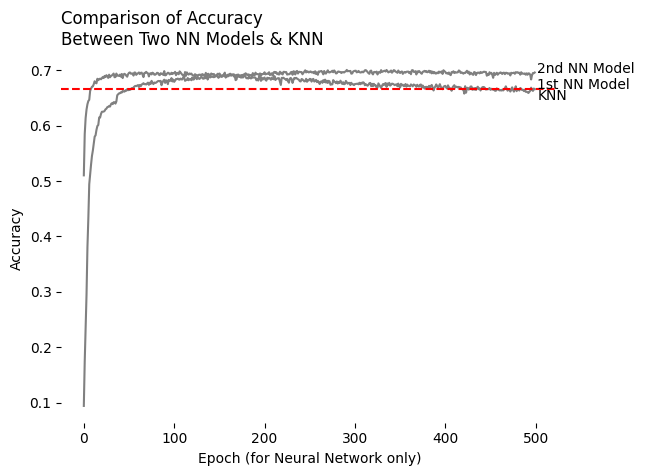

In [132]:
plt.plot(acc_list_shallower, color='grey')
plt.plot(acc_list_deeper, color='grey')
plt.axhline(acc_knn, color='red', linestyle='--')
plt.text(502, acc_knn-0.02, f'KNN', color='black')
plt.text(502, (acc_list_shallower[len(acc_list_shallower)-1]), f'1st NN Model')
plt.text(502, (acc_list_deeper[len(acc_list_deeper)-1]), f'2nd NN Model')
plt.title('Comparison of Accuracy \nBetween Two NN Models & KNN', loc='left')
plt.xlabel('Epoch (for Neural Network only)')
plt.ylabel('Accuracy')
ax = plt.gca()
ax.set_frame_on(False)